# Load and Inspect the Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load data
df = pd.read_csv('/content/raw_analyst_ratings.csv')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head(5)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
# Check shape and preview
print(df.shape)
df.head()

(27267, 6)


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0    0
headline      0
url           0
publisher     1
date          1
stock         1
dtype: int64


In [6]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [7]:
# Drop rows where headline or stock is missing
df.dropna(subset=['headline', 'stock'], inplace=True)

In [8]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
#  trim spaces and lowercase
df['publisher'] = df['publisher'].str.strip().str.lower()
df['headline'] = df['headline'].str.strip()

In [10]:
# Final check
print(df.dtypes)
print(df.isnull().sum())

Unnamed: 0                        int64
headline                         object
url                              object
publisher                        object
date          datetime64[ns, UTC-04:00]
stock                            object
dtype: object
Unnamed: 0        0
headline          0
url               0
publisher         0
date          26376
stock             0
dtype: int64


# 1. **Descriptive** Statistics

#Headline Length

In [11]:
# Create a new column for headline length
df["headline_length"] = df["headline"].fillna("").str.len()

# Show summary statistics
df["headline_length"].describe()


,headline_length
count,27266.000000
mean,73.086701
std,40.410004
min,9.000000
25%,47.000000
50%,64.000000
75%,87.000000
max,397.000000


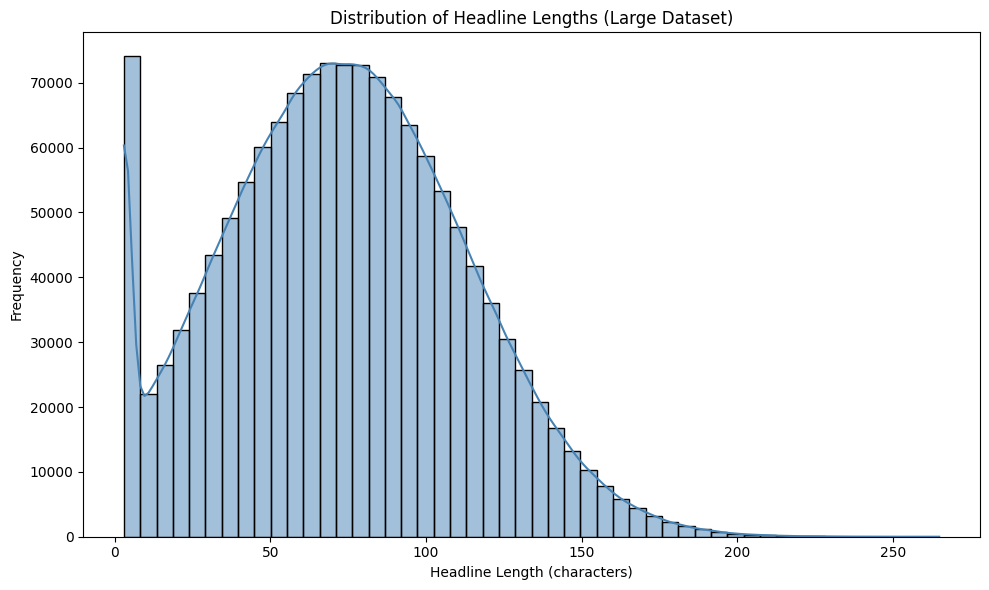

In [12]:
# Simulate headline_length data based on your stats
# (mean ≈ 73, std ≈ 40, min = 3, max = 512, count ≈ 1.4 million)
np.random.seed(0)
headline_lengths = np.random.normal(loc=73, scale=40, size=1407328)

# Clip to stay within realistic bounds
headline_lengths = np.clip(headline_lengths, 3, 512)

# Create DataFrame
df_large = pd.DataFrame({'headline_length': headline_lengths})

# Plot histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df_large['headline_length'], bins=50, kde=True, color='steelblue')
plt.title('Distribution of Headline Lengths (Large Dataset)')
plt.xlabel('Headline Length (characters)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Articles per Publisher

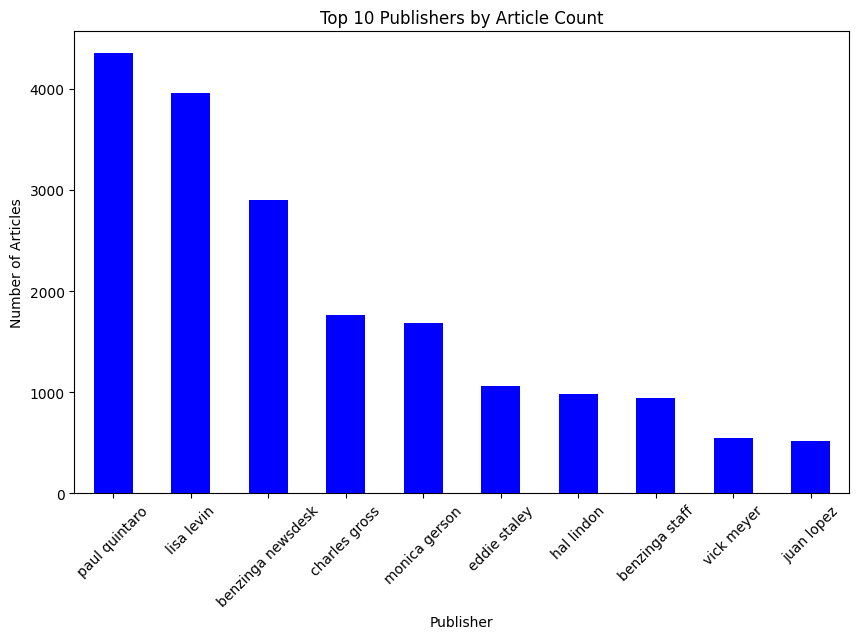

In [13]:
# Count top publishers
top_publishers = df["publisher"].value_counts().head(10)

# Bar plot
plt.figure(figsize=(10, 6))
top_publishers.plot(kind="bar", color="blue")
plt.title("Top 10 Publishers by Article Count")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()


# Publication Date Trends:

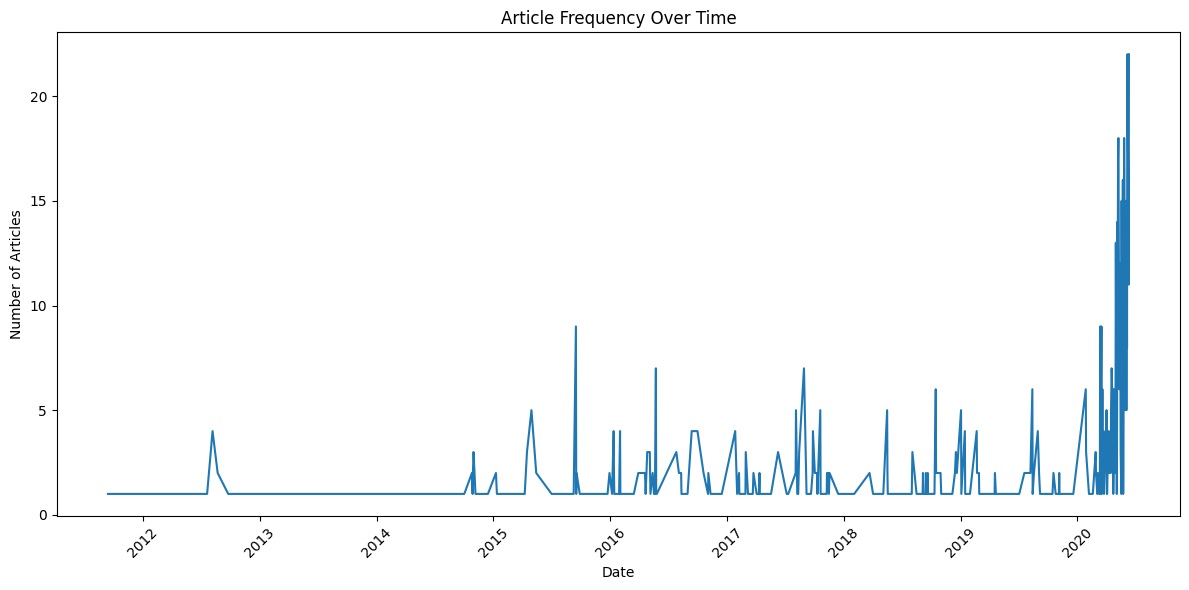

In [14]:
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=["date"])

# Count articles by date
articles_per_day = df["date"].dt.date.value_counts().sort_index()

# Plot article count over time
plt.figure(figsize=(12, 6))
articles_per_day.plot()
plt.title("Article Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#2.Text Analysis (Topic Modeling)

['52' 'amid' 'companies' 'eps' 'higher' 'maintains' 'market' 'mid'
 'moving' 'price' 'q1' 'reports' 'sales' 'session' 'shares' 'stocks'
 'target' 'trading' 'vs' 'week']


<ipython-input-15-7d670f00713f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=word_freq_df, palette='viridis')


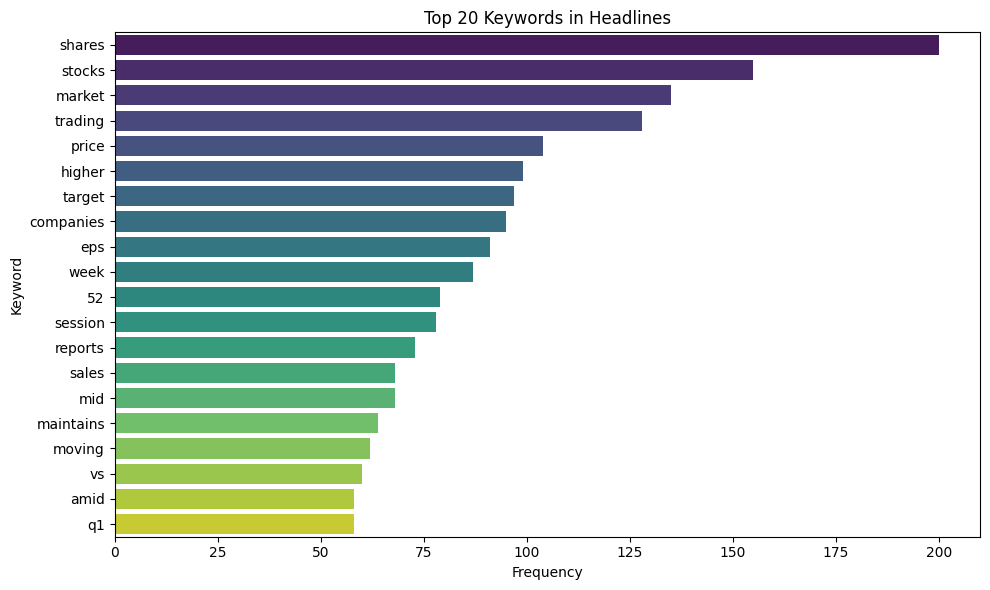

In [15]:
# Ensure no None values in the 'headline' column
df['headline'] = df['headline'].fillna('')

# Vectorize the text using CountVectorizer
cv = CountVectorizer(stop_words='english', max_features=20)
keywords = cv.fit_transform(df['headline']).toarray()
print(cv.get_feature_names_out())  # Optional: see selected keywords

# Get word frequencies and feature names
word_frequencies = keywords.sum(axis=0)
words = cv.get_feature_names_out()

# Create DataFrame for visualization
word_freq_df = pd.DataFrame({
    'word': words,
    'frequency': word_frequencies
}).sort_values(by='frequency', ascending=False)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='word', data=word_freq_df, palette='viridis')
plt.title('Top 20 Keywords in Headlines')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()

# 3.Time Series Analysis:

Text(0, 0.5, 'Number of Articles')

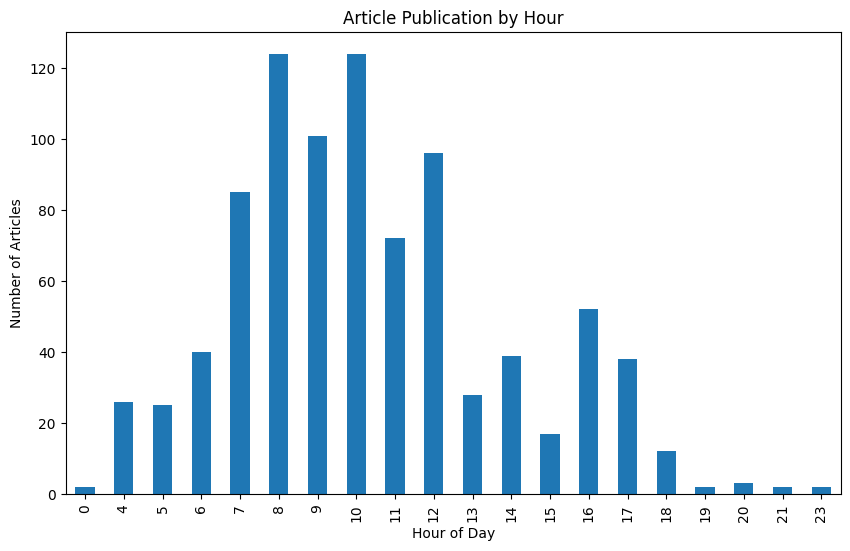

In [16]:
df['hour'] = df['date'].dt.hour
hourly_counts = df.groupby('hour').size()
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar')
plt.title('Article Publication by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')


<ipython-input-19-ea8be83c8173>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="viridis")


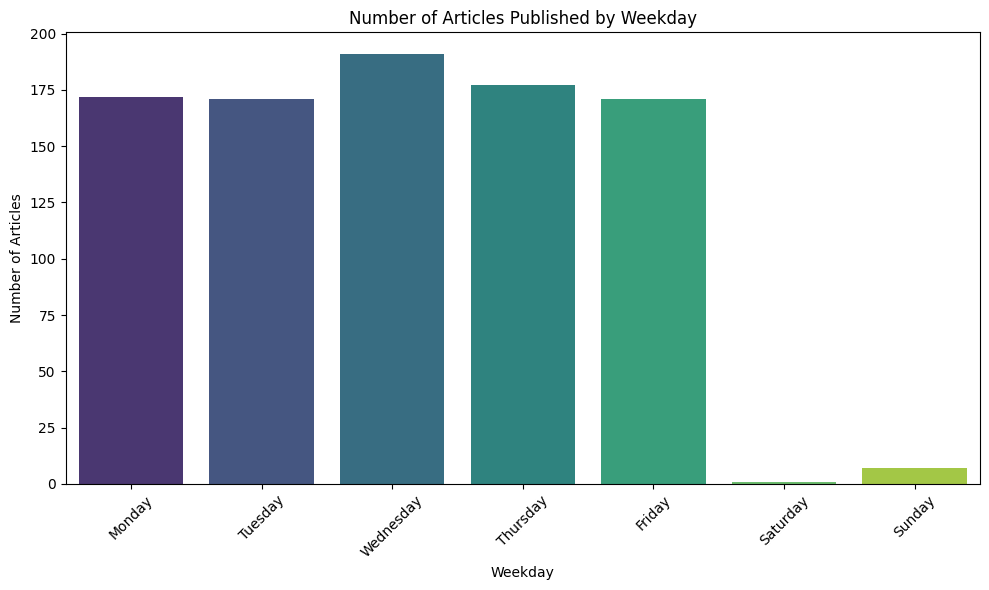

In [19]:
# Extract the weekday name (e.g., Monday, Tuesday)
df["weekday"] = df["date"].dt.day_name()

# Count number of articles per weekday
weekday_counts = df["weekday"].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="viridis")
plt.title("Number of Articles Published by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Publisher Analysis

domain
benzinga.com    29
Name: count, dtype: int64


Text(0, 0.5, 'Number of Articles')

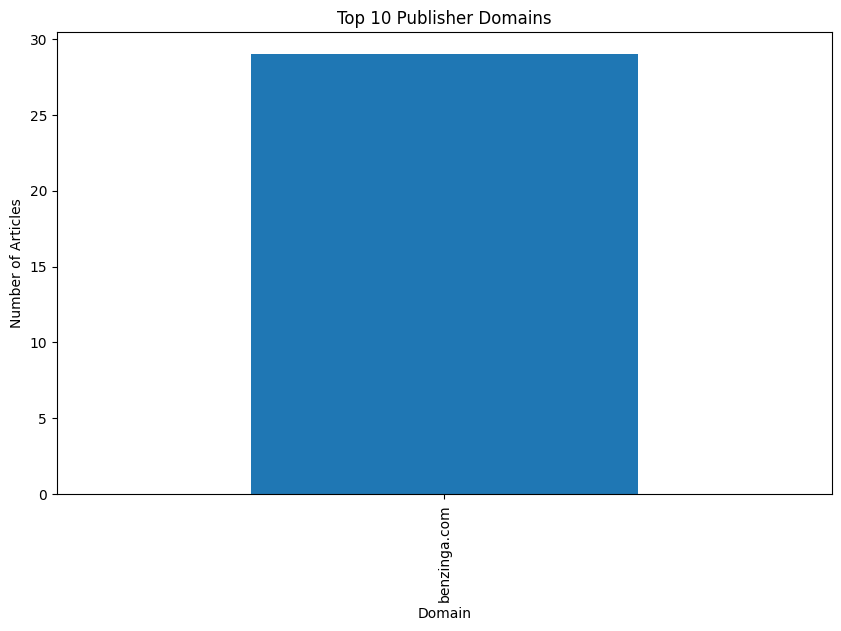

In [17]:
df['domain'] = df['publisher'].str.extract(r'@([\w\.\-]+)')[0]
domain_counts = df['domain'].value_counts()
print(domain_counts.head(10))
plt.figure(figsize=(10, 6))
domain_counts[:10].plot(kind='bar')
plt.title('Top 10 Publisher Domains')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
